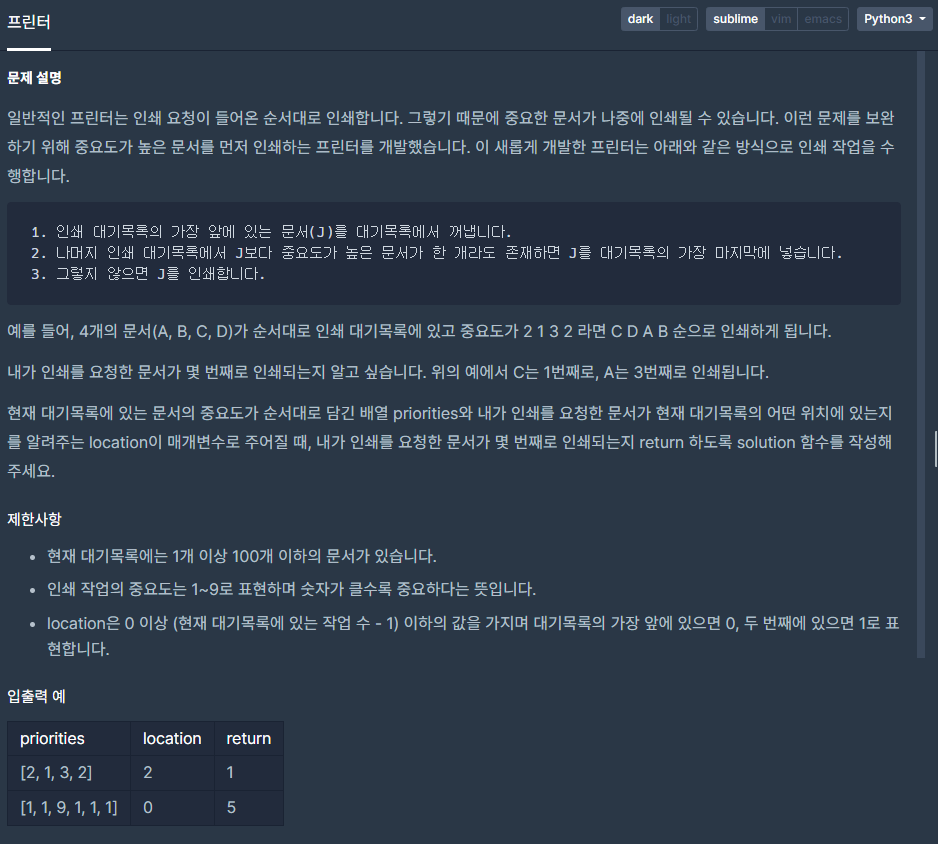
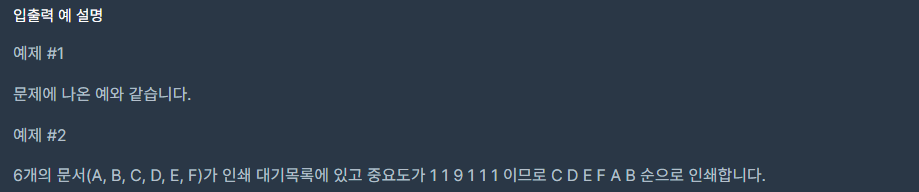

* 링크 : https://programmers.co.kr/learn/courses/30/lessons/42587

location의 인덱스는 0부터 시작이고, return(출력되는 값)의 인덱스는 1부터 시작

return = location이 2인 문서가 priorities에서 실제 출력 시 몇 번째로 출력되는가

In [61]:
''' 내가 푼 - 히든 4개 맞춤'''
from collections import deque

def solution(priorities, location):
    arr = [[i, 0] for i in priorities]    
    print_num = 1
    arr[location][1] = 9       # flag
    
    pri = deque(arr)
    
    while pri:
        tmp = pri.popleft()    # 일단 맨앞에 것 하나 뽑아둔다
        
        if not pri: return print_num + 1
        else: max_tmp = pri.index(max(pri))    # max값의 idx를 뽑아둔다   
        
        # 비교 후 max보다 작다면 끝으로 이동 및 삭제 대상 = max값
        if tmp[0] < pri[max_tmp][0]:  
            pri.append(tmp)
            rm_tmp = pri[max_tmp]
        else:                          # 작지않으면 삭제 대상 = 맨앞 값 
            rm_tmp = tmp
        
        # 삭제 대상의 Falg가 내가 찾는 값이라면 반복 끝, 출력순서 리턴
        if rm_tmp[1] == 9:
            return print_num
        else:                      # 아니라면 삭제만 하고 출력 순서 ++
            pri.remove(rm_tmp)
            print_num += 1
    
    return print_num

In [62]:
print(solution([2, 1, 3, 2], 2))
print(solution([1, 1, 9, 1, 1, 1], 0))

1
5


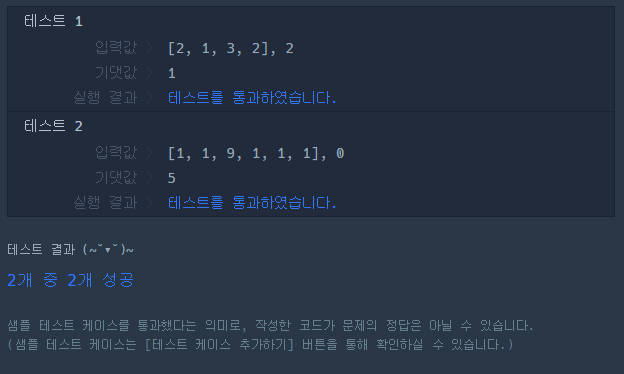

In [65]:
''' 다른 사람 코드 - 히든 3개 틀림 '''
# priorities를 queue로 사용. 숫자를 dequeue하고
# 그것과 queue에 남은 값들 중 max value와 비교, 작으면 다시 enqueue, 크거나 같으면 print
# ** 큐에서 숫자를 하나씩 꺼낼 때마다 location -= 1
# ** 인쇄할 문서를 꺼내는 시점의 location은 0이 된다.
# 인쇄할 문서를 꺼내고 max value보다 크면 stop, 작으면 enqueue하고
# location을 현재 priorities의 길이와 같게 하기. 원하는 서류가 가장 마지막에 있으므로..
def solution(priorities, location):
    if len(priorities) == 1:
        return 1
    
    cnt = 1                        #예비 출력순서
    candidate = priorities.pop(0)  #맨앞 값 일단 뽑아
    
    while priorities:
        if location > 0:                      # 내가 찾을 문서가 맨앞이 아닐 경우
            if candidate < max(priorities):   # 어쨌든 맨 앞에 있는 애 크기 비교 후 
                priorities.append(candidate)  # max보다 작으면 뒤로 보내
            else:                             # max보다 크면 걔를 꺼내
                cnt += 1                      # 출력순서 +1
            location -= 1                     # 맨앞 사라졌으니 -1 (앞당겨짐)
        else:                                 # 내가 찾을 문서가 맨앞에 왔을 경우
            if candidate < max(priorities):   # 맨 앞이라도 max보다 작으면 맨뒤로
                priorities.append(candidate)
                location = len(priorities) - 1 # 내찾문이 맨앞에 있다가 맨뒤로 갔으니 loc도 변경
            else:
                break                          # 내찾문 맨앞 + 젤커 = 끝
                
        candidate = priorities.pop(0)          # pop은 여기서 (deque 안쓴 방법)

    # 인쇄할 숫자가 가장 마지막에 나왔을 경우 
    if not priorities:
        answer = len(priorities)
    else:
        answer = cnt
    return answer

In [66]:
print(solution([2, 1, 3, 2], 2))
print(solution([1, 1, 9, 1, 1, 1], 0))

1
5
